## STAT301 2024W2 Group 26 Project 
</br> *Eaven (23540214), Lucas (53427739), Rahul (), Aryan ()*

2025-04-12 <br>

### Loading of Libraries & Dataset

In [1]:
suppressPackageStartupMessages({
library(haven)    # Loading of .dta, .csv etc. datasets
library(tidyverse)
library(dplyr)
library(datasets)
library(car)
install.packages("vtable")    # maybe needed if not installed
# install.packages("corrplot")  # maybe needed if not installed
# install.packages("sandwich")  # maybe needed if not installed
# install.packages("lmtest")    # maybe needed if not installed
library(vtable)
library(corrplot)
library(sandwich)
library(lmtest)
library(repr)
library(tidymodels)
install.packages("stargazer")      # maybe needed if not installed
library(stargazer)
library(modelr)
library(broom)
library(infer)
library(GGally)
library(leaps)
library(glmnet)
install.packages("poissonreg")
library(poissonreg)
# install.packages("caret")      # maybe needed if not installed
library(caret)
install.packages("coefplot")      # maybe needed if not installed
library(coefplot)
})

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé



In [2]:
# Read the CSV file with specified column types 
market_data <- as_factor(read_delim("https://raw.githubusercontent.com/DrakenRaptor/STAT301_ProjectGrp26/refs/heads/main/marketing_campaign.csv", delim = "\t"))

# Check the structure of data types 
str(market_data)

head(market_data)
str(market_data$Dt_Customer)


Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [2,240 × 29] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID                 : num [1:2240] 5524 2174 4141 6182 5324 ...
 $ Year_Birth         : num [1:2240] 1957 1954 1965 1984 1981 ...
 $ Education          : chr [1:2240] "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr [1:2240] "Single" "Single" "Together" "Together" ...
 $ Income             : num [1:2240] 58138 46344 71613 26646 58293 ...
 $ Kidhome            : num [1:2240] 0 1 0 1 1 0 0 1 1 1 ...
 $ Teenhome           : num [1:2240] 0 1 0 0 0 1 1 0 0 1 ...
 $ Dt_Customer        : chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...
 $ Recency            : num [1:2240] 58 38 26 26 94 16 34 32 19 68 ...
 $ MntWines           : num [1:2240] 635 11 426 11 173 520 235 76 14 28 ...
 $ MntFruits          : num [1:2240] 88 1 49 4 43 42 65 10 0 0 ...
 $ MntMeatProducts    : num [1:2240] 546 6 127 20 118 98 164 56 24 6 ...
 $ MntFishProducts    : num [1:2240] 172 2 111 10 46 0 50 3

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


 chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...


## Introduction
Understanding and predicting customer behavior is crucial for companies aiming to boost sales and drag interest. [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) (CPA) is essential in helping a company to understand its customers and tailor their products to fit each customer's preferences. Previous studies has shown that targeted advertisements increases brand searches by 79% (Ayman, 2012). This highlights the importance of CPA in increasing a customer's interest towards the company. Though many past researches has studied on how targeted marketing through CPA affects the customers brand-related web searches, relationship between a customer’s personal data, purchasing habits, and their frequency of web purchases remains underexplored.

This study aims to fill this knowledge deficit by answering the research question:
### <span style="color: red;"> Can we predict a customer's number of web purchases based on their personal data and purchasing habits? </span>
By answering this question, we hope to indentify the dominant factors that influence online purchasing frequencies. Providing valuable influences and an effective model for businesses and companies looking to refine their marketing strategies.

## Data Description

To answer this question, we will be using the Customer Personality Analysis dataset provided by Dr. Omar Romero-Hernandez.
The customer personality analysis is a dataset that links customer's status with their purchase patterns. There are a total of 2240 observations and 28 variables split into 4 groups. **The method of collection was not specified**
- People, the personal data of customer.
- Products, the amount customer spent on a certain type of product in the last 2 years
- Promotion, whether or not customers participated in past promotions/discounts
- Place, where and amount the customer made the purchase

The details of each columns are as followed
| **Variable Name**       | **Type**     | **Description**                                               |
|-------------------------|--------------|---------------------------------------------------------------|
| `ID`                    | Count Data   | Unique identifier for each customer                           |
| `Year_Birth`            | Count Data   | Year of birth of the customer                                 |
| `Education`             | Factor       | Education level of the customer                               |
| `Marital_Status`        | Factor       | Marital status of the customer                                |
| `Income`                | Numeric      | Annual income of the customer                                 |
| `Kidhome`               | Count Data   | Number of children in the customer's household                |
| `Teenhome`              | Count        | Number of teenagers in the customer's household               |
| `Dt_Customer`           | Date\*       | Date of enrollment with the company                           |
| `Recency`               | Count Data   | Days since the last purchase                                  |
| `MntWines`              | Numeric      | Amount spent on wine                                          |
| `MntFruits`             | Numeric      | Amount spent on fruits                                        |
| `MntMeatProducts`       | Numeric      | Amount spent on meat products                                 |
| `MntFishProducts`       | Numeric      | Amount spent on fish products                                 |
| `MntSweetProducts`      | Numeric      | Amount spent on sweet products                                |
| `MntGoldProds`          | Numeric      | Amount spent on gold products                                 |
| `NumDealsPurchases`     | Count Data   | Number of purchases made with a discount                      |
| `NumWebPurchases`       | Count Data   | Number of purchases made through the web                      |
| `NumCatalogPurchases`   | Count Data   | Number of purchases made using a catalog                      |
| `NumStorePurchases`     | Count Data   | Number of purchases made directly in stores                   |
| `NumWebVisitsMonth`     | Count Data   | Number of visits to the company's website in the last month   |
| `AcceptedCmp3`          | Binary       | 1 if the customer accepted the 3rd campaign, 0 otherwise      |
| `AcceptedCmp4`          | Binary       | 1 if the customer accepted the 4th campaign, 0 otherwise      |
| `AcceptedCmp5`          | Binary       | 1 if the customer accepted the 5th campaign, 0 otherwise      |
| `AcceptedCmp1`          | Binary       | 1 if the customer accepted the 1st campaign, 0 otherwise      |
| `AcceptedCmp2`          | Binary       | 1 if the customer accepted the last campaign, 0 otherwise     |
| `Complain`              | Binary       | 1 if the customer has complained in the last 2 years, 0 otherwise |
| `Country`               | Factor       | Country of the customer                                       |


*Given that `Dt_Customer` can be manipulated within the tidyverse library in*
```r 
library(lubridate)
```
*Hence, I have classified it as a `Date` type in the Data Type.* 

<span style="color: magenta;"> `Z_CostContact`, `Z_Revenue` will be dropped in Data Wrangling, since there were no description on these 2 columns. </span>

**Data Source**: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

The data was provided by Dr. Omar Romero-Hernandez of UC Berkeley. 

## Data Wrangling

The following are the steps taken to clean and prepare our data

1. Dropped 24 rows where na values were found in `Income`.
2. Convert all `2n Cycle` values in `Education` to `Master`, as they are [equivalent](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/discussion/466400).
3. Converted all awkwardly named values in `Marital_Status` to `Single`.
4. Remove the columns `Z_CostContact`, `Z_Revenue` and `ID`, as they do not contribute to our analysis.
5. Converting `Education`, `Marital_Status` and `Dt_Customer` to their appropriate types.
6. Renamed Response to `AcceptedPrevCmp` to avoid confusion.
7. Log-transformed Income to avoid outliers and improve linearity


In [3]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (debugged/collate)

## Step 1
print("Number of NAs by column before cleaning:")
print(colSums(is.na(market_data)))
market_data <- market_data |> filter(!is.na(Income))
print("Number of NAs by column after cleaning:")
print(colSums(is.na(market_data)))

[1] "Number of NAs by column before cleaning:"
                 ID          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  0                   0                   0   

In [4]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Step 2
print("Before:")
print(table(market_data$Education))
market_data <- market_data %>%
    mutate(Education = case_when(
        Education == "2n Cycle" ~ "Master",
        TRUE ~ Education
    ))
print("After:")
print(table(market_data$Education))

[1] "Before:"

  2n Cycle      Basic Graduation     Master        PhD 
       200         54       1116        365        481 
[1] "After:"

     Basic Graduation     Master        PhD 
        54       1116        565        481 


In [5]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)


# Step 3
print("Before:")
print(table(market_data$Marital_Status))
market_data <- market_data %>%
    mutate(Marital_Status = case_when(
        Marital_Status %in% c("Absurd", "Alone", "YOLO", "Together") ~ "Single",
        TRUE ~ Marital_Status
    ))
print("After:")
print(table(market_data$Marital_Status))

[1] "Before:"

  Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      232      857      471      573       76        2 
[1] "After:"

Divorced  Married   Single    Widow 
     232      857     1051       76 


In [6]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Step 4
market_data <- market_data %>% 
    select(-Z_CostContact, -Z_Revenue, -ID) 

In [7]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate/debugged)

#Step 5
market_data <- market_data |> 
mutate(Education = as.factor(Education), Marital_Status = as.factor(Marital_Status), Dt_Customer = as.Date(Dt_Customer)) |>
mutate(Year = year(Dt_Customer), Month = month(Dt_Customer), Day = day(Dt_Customer)) |>
rename(AcceptedPrevCmp = Response)

colnames(market_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Dt_Customer = as.Date(Dt_Customer)`.
Caused by warning in `strptime()`:
! datetimes before 1902 may not be accurate: warns once per session”


[1] "Year_Birth"          "Education"           "Marital_Status"     
 [4] "Income"              "Kidhome"             "Teenhome"           
 [7] "Dt_Customer"         "Recency"             "MntWines"           
[10] "MntFruits"           "MntMeatProducts"     "MntFishProducts"    
[13] "MntSweetProducts"    "MntGoldProds"        "NumDealsPurchases"  
[16] "NumWebPurchases"     "NumCatalogPurchases" "NumStorePurchases"  
[19] "NumWebVisitsMonth"   "AcceptedCmp3"        "AcceptedCmp4"       
[22] "AcceptedCmp5"        "AcceptedCmp1"        "AcceptedCmp2"       
[25] "Complain"            "AcceptedPrevCmp"     "Year"               
[28] "Month"               "Day"

In [8]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate/debugged)

# Step 6
# Added 1 to avoid zero values
market_data <- market_data |> mutate(LogIncome = log(Income + 1))
market_data <- market_data |> select(-Income)

In [ ]:
# Result
head(market_data)

Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,⋯,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedPrevCmp,Year,Month,Day,LogIncome
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1957,Graduation,Single,0,0,0004-09-20,58,635,88,546,⋯,0,0,0,0,0,1,4,9,20,10.97059
1954,Graduation,Single,1,1,0008-03-20,38,11,1,6,⋯,0,0,0,0,0,0,8,3,20,10.74387
1965,Graduation,Single,0,0,0021-08-20,26,426,49,127,⋯,0,0,0,0,0,0,21,8,20,11.17905
1984,Graduation,Single,1,0,0010-02-20,26,11,4,20,⋯,0,0,0,0,0,0,10,2,20,10.19043
1981,PhD,Married,1,0,0019-01-20,94,173,43,118,⋯,0,0,0,0,0,0,19,1,20,10.97325
1967,Master,Single,0,1,0009-09-20,16,520,42,98,⋯,0,0,0,0,0,0,9,9,20,11.04315


## Research Question (Question of Interest)

Customer Personality Analysis is essential to help a firm to modify its product to meet the needs of customers from different segments. In this project, I wish to predict the number of purchases spent made on the web `NumWebPurchases` among customers against the different covariates or predictors such as customer's `Income`, level of education, `NumStorePurchases` , `NumCatalogPurchases`, `NumWebVisitsMonth`, `MntGoldProducts`.

<span style="color: magenta;"> The research question will primarily be focused on prediction. </span>

**<br> Legend:**
- `NumWebPurchases` is the response variable, representing the number of web purchases made through the company's website.
- `Income` is a covariate that indicates the annual earnings of the customer.
- `NumStorePurchases` is a covariate representing the number of purchases made in physical stores.
- `NumCatalogPurchases` is a covariate representing the number of purchases made using a catalog.
- `NumWebVisitsMonth` is a covariate representing the number of visits to the company's website in the last month.
- `MntGoldProds` is a covariate representing the amount spent on gold products.
- `Education` is a covariate that can be represented as a categorical variable.
- `Marital_Status` is a categorical variable that can be represented numerically.
- `NumStorePurchases` is one of the covariates or predictor which represents the number of purchases made in store.
- `Marital_Status` is a categorical variable which can be represented by numerical
- `Education` is one of the covariates which can be represented by a categorical variable.

The code belows shows the unique values present in the `Education` and `Marital_Status` column of the `market_data` data frame. 


In [10]:
unique(market_data$Education)  
unique(market_data$Marital_Status)     # Possible covariates to be used as factor variables for research model, to classify YOLO as single?
market_data_web <- market_data |>
    select(MntGoldProds)

head(market_data_web)
tail(market_data_web)


# Extract the unique values and their counts
education_counts <- table(market_data$Education) 
education_counts


# Extract Unique values of Marital Status
marital_counts <- table(market_data$Marital_Status)
marital_counts


[1] Graduation PhD        Master     Basic     
Levels: Basic Graduation Master PhD

[1] Single   Married  Divorced Widow   
Levels: Divorced Married Single Widow

MntGoldProds
<dbl>
88
6
42
5
15
14


MntGoldProds
<dbl>
9
247
8
24
61
21



     Basic Graduation     Master        PhD 
        54       1116        565        481 


Divorced  Married   Single    Widow 
     232      857     1051       76 

## EDA and Visualisation

### 1. Correlation Plot Between Continuous Random Variables


A correlation plot maybe suitable to check for the relationship between the continuous random variable such as `Income`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `NumStorePurchases`, `NumWebPurchases`. The correlation plot provides a visual summary of the linear relationship betweem the selected variables. This can help me to see which variables I can include in the regression model for analysation which will be done at a later stage. Additionally, the correlation plot serves as an indicator to check if there's perfect multicolinearity between different variables where an extreme high correlation coefficients (close to -1 or +1) may indicate that.

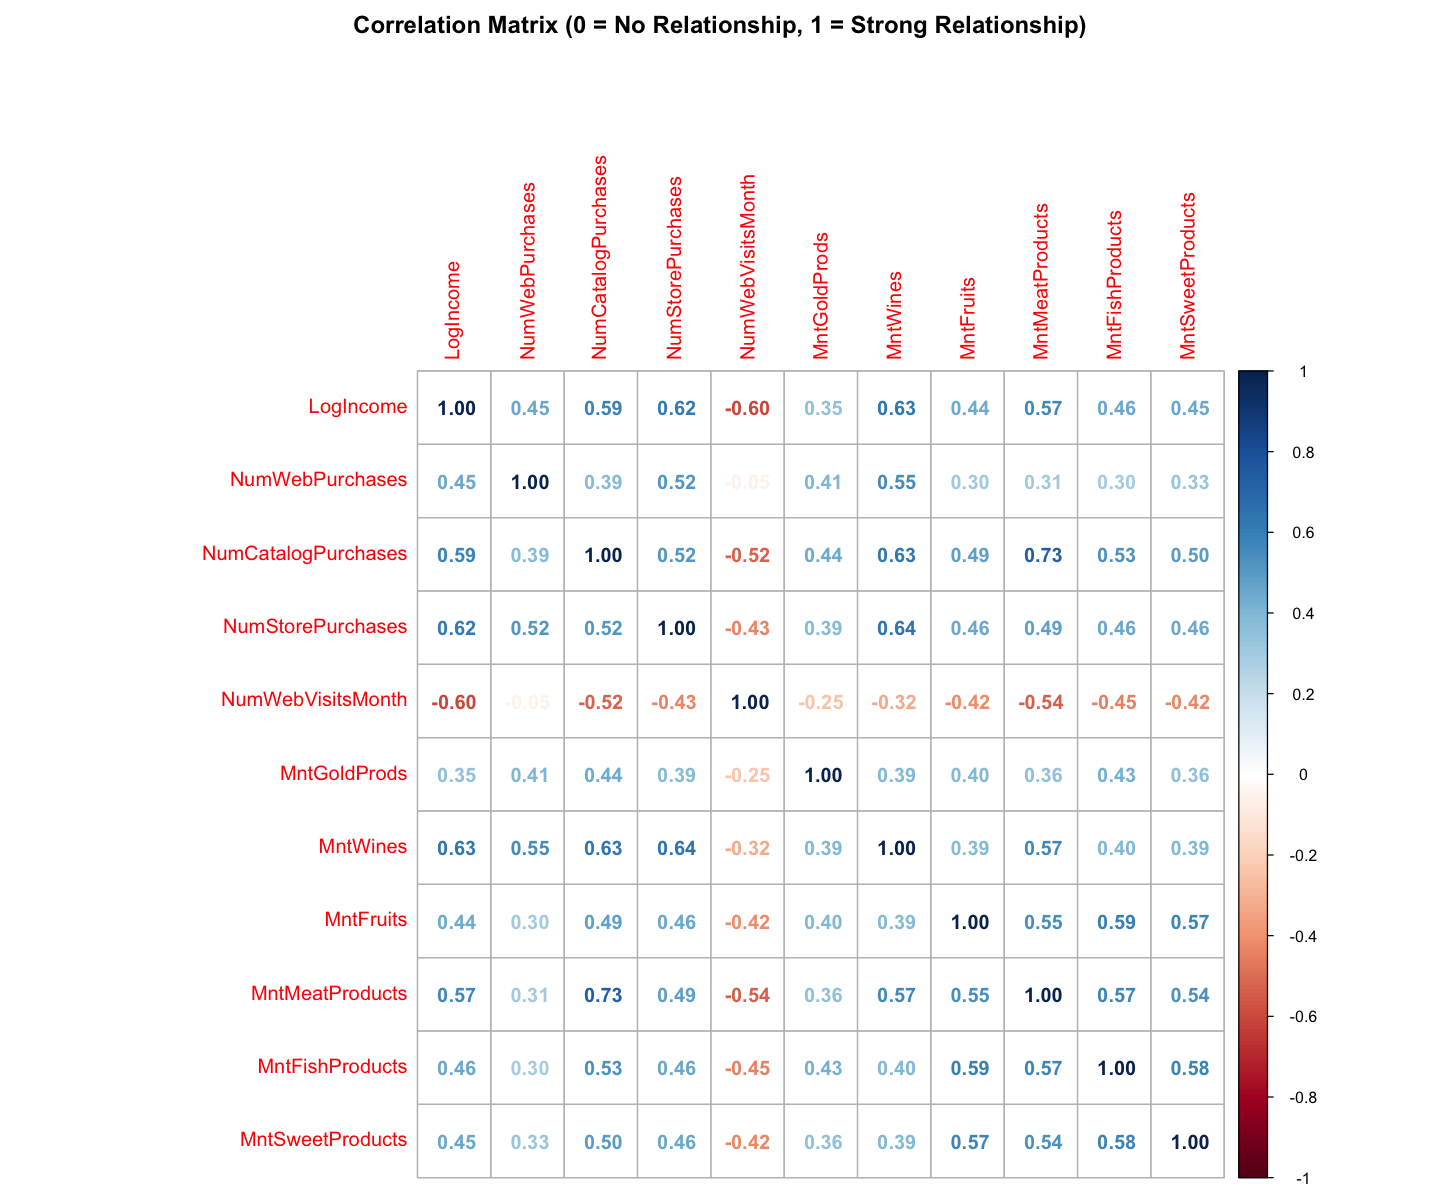

In [ ]:
# Main developer: Eaven

options(repr.plot.width = 12, repr.plot.height = 10)
# Using correlation plot to check the relationship between the variables
corr_plt_dat <- market_data[, c("LogIncome", "NumWebPurchases", "NumCatalogPurchases",
 "NumStorePurchases", "NumWebVisitsMonth", "MntGoldProds", "MntWines", "MntFruits", 
 "MntMeatProducts", "MntFishProducts", "MntSweetProducts")] |>
as.data.frame() 
# Ensure there are no missing values
corr_plt_dat <- na.omit(corr_plt_dat)

cor_matrix <- cor(corr_plt_dat)

# Plot the correlation matrix with a title
corrplot(cor_matrix, 
         method = "number", 
         addrect = 2, 
         title = "Correlation Matrix (0 = No Relationship, 1 = Strong Relationship)", 
         mar = c(0, 0, 2, 0))  # Adjust margins to fit the title

From the correlation plot, there seems to be a strong positve relationship between `NumCatalogPurchases` and `MntMeatProducts`. This suggests that the amount of meat products spent is strongly correlated through the `NumCatalogPurchases` which implies that most customers will look through the Catalogue before purchasing meat products. Additionally, there's seems to be a weaker (moderate) relationship between `Income` and `NumWebVisitsMonth` which suggests that there's no relation between these 2 variables.

### 2. Scatterplot of NumWebPurchases vs Income Faceted by Kidhome

The scatterplot allows us to visually explore how the demographic factors used in the plot might influence purchasing habits. While there is not much data for PHDs, making the trends in the plot somewhat unclear, we can see that the number of web purchases scales positively with yearly income. In addition, we can see in general income and the number of purchases go down as the number of kids a customer has goes up. 

`geom_smooth()` using formula = 'y ~ x'


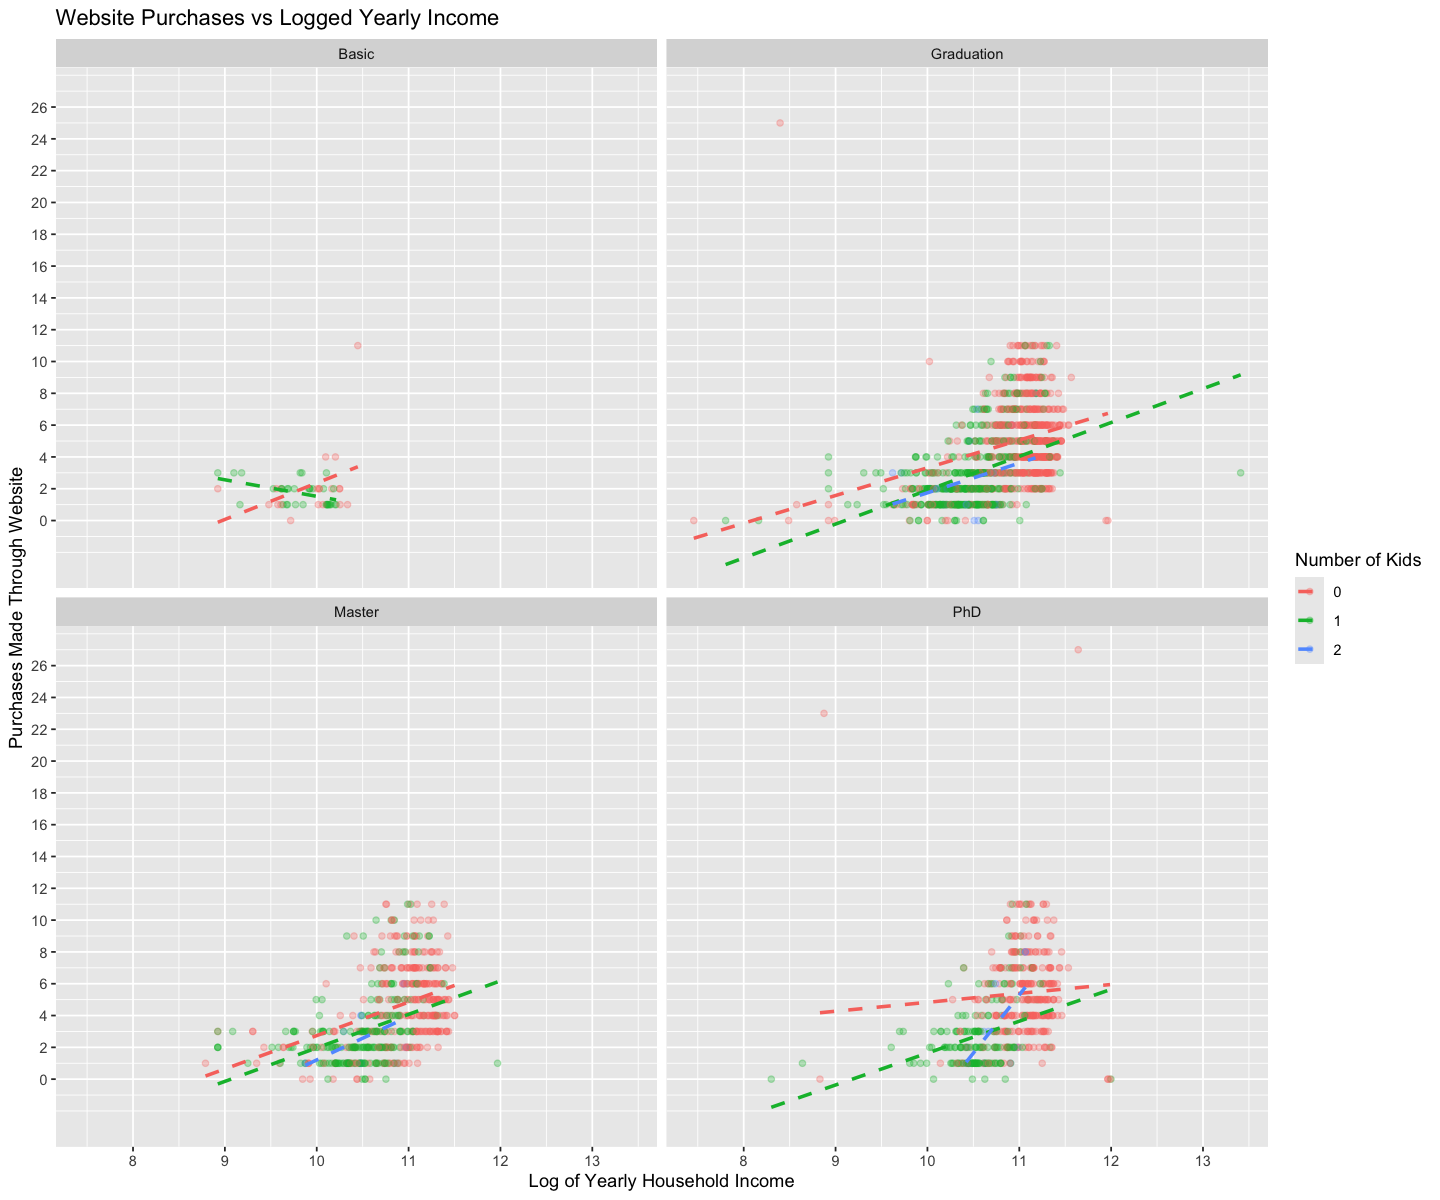

In [ ]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Creating a Scatterplot of NumWebPurchases vs Income Faceted by Kidhome
p1 <- ggplot(market_data, aes(x = LogIncome, y = NumWebPurchases, color = as.factor(Kidhome))) +
  geom_point(alpha = 0.3, size = 1.5) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  facet_wrap(~ Education, labeller = label_wrap_gen(width = 20)) +
  scale_x_continuous(name = "Log of Yearly Household Income", breaks = seq(5, max(market_data$LogIncome, na.rm = TRUE), by = 1)) +
  scale_y_continuous(name = "Purchases Made Through Website", breaks = seq(0, max(market_data$NumWebPurchases, na.rm = TRUE), by = 2)) +
  xlab("Yearly Household Income") +
  ylab("Purchases Made Through the Company Website") +
  scale_color_discrete(name = "Number of Kids") +  
  ggtitle("Website Purchases vs Logged Yearly Income")

# Display the plot
print(p1)

## Methods and Plan

Given that the requirement of the project is to use Poisson Regression. Ridge and LASSO Regression are used to decide if which variables are relevant for analysis under Variable Selection section.

Since the research question is focused on prediction as mentioned above, there's a need to split the dataset between the testing and training datasets using the `tidymodels` package. The code below shows the splitting of the dataset, where 75% of the data is split as training data and 25% for testing data. 

*For brevity purposes, the testing data will **NOT** be used at this stage, but it will be used in the final report.*

In [ ]:
# Remove rows with missing values
market_data <- na.omit(market_data)
set.seed(5638)

market_data_split <- initial_split(market_data, prop = 0.75, strata = Income)
market_data_train <- training(market_data_split)

market_data_test <- testing(market_data_split)

head(market_data_train)
cat('\nMarket Training Data has', nrow(market_data_train), 'rows.\n')

In [ ]:
cat('\nMarket Testing data has', nrow(market_data_test), 'rows.')

In [ ]:
# Define the Poisson regression specification
poisson_spec <-
    poisson_reg() %>%
    set_engine("glm") %>%
    set_mode("regression")

# Define the recipe
poisson_recipe <- recipe(NumWebPurchases ~ ., data = market_data_train) %>%
    update_role(ID, new_role = "ID") %>%  # Exclude ID from being used as a predictor
    update_role(Year_Birth, new_role = "excluded")  # Exclude Year_Birth from being used as a predictor

# Create and fit the workflow
poisson_model <-
    workflow() %>%
    add_recipe(poisson_recipe) %>%
    add_model(poisson_spec) %>%
    fit(data = market_data_train)

poisson_coeffs <- poisson_model |>
    extract_fit_parsnip() |>
    tidy()

poisson_coeffs

### Justification
The code above shows the poisson regression analysis where `NumWebPurchases` is the response variable which represents count data. Poisson regression is specifically designed to model count data which is suitable when the response variable is non-negative integer (e.g. 0, 1, 2...). The method allows us to model the relationship between the count response variable and multiple covariates (e.g. `Income`, `MntGoldProds`, `NumCatalogPurchases` etc.). Although Poisson Regression is good to compare count data, there are still some potential limitations of this method. Overdispersion is **one** potential limitation where the variance of the response variable is greater than the mean, where the regression model may underestimate the standard errors which may lead to invalid statisical inferences. Underdispersion may occur where the variance is less than the mean where the model may not fit well. This will be addressed in the **Robust Analysis & Overdispersion Test Section** below. 

Additionally, `ID` has been excluded in this analysis since it's insignificant to the regression since it's for easier recognition of the customer that made the purchases. However, Poisson regression through prediction is very useful for modelling count data `NumWebPurchases` which allows us to explore the relationship between the response variable and various covariates.



The code below shows the Poisson Regression for the training model where `Z_Revenue`, `Dt_Customer`, `Z_Cost` has been excluded and they are in `subset_train`.

In [ ]:
# Exclude Z_Revenue and Dt_Customer from the dataset
subset_train <- market_data_train |> 
	select(-Dt_Customer, -ID, -Year_Birth)

# Fit the Poisson regression model
reg1 <- glm(NumWebPurchases ~ ., 
			data = subset_train, 
			family = poisson())

summary(reg1)

The code below checks for overdispersion by calculating the dispersion ratio. 

In [ ]:
dispersion_ratio <- deviance(reg1) / df.residual(reg1)
round(dispersion_ratio, 6)

Given that `dispersion_ratio` is **0.8686** which indicates that there's equidispersion (since it's close to 1) where the variance of the response variable is close to the mean which satifies the Poisson assumption.

### Variable Selection in `market_data`

Regularisation in Generalised Linear Models (GLMs) uses *shrinkage methods* which can be deployed for both logistic and Poisson Regression. Regularisation is used to improve predictive models where some biases are introduced in exchange for the reduction of the model's variance. LASSO and Ridge Regression will be used to evaulate which variables are suitable for the Regression Model. The code below shows the LASSO Regression for Poisson Model. LASSO regression performs variable selection by *shrinking* some coefficients to exactly 0, which it excludes less important predictors from the model. Ridge regression shrinks all coefficients but all covariates/predictors are still **retained** even covariates with small effects which sets it apart from LASSO.

In [ ]:
# Prepare the data
market_data_X_train <- model.matrix(NumWebPurchases ~ ., data = subset_train)[, -1]  # Remove intercept column
market_data_Y_train <- subset_train$NumWebPurchases  # Response variable

# Fit Lasso regression
lasso_model <- cv.glmnet(
  market_data_X_train, market_data_Y_train, 
  family = "poisson", 
  alpha = 1,  # Lasso regression
  nfolds = 10  # Cross-validation
)

# Best lambda (penalty parameter) from cross-validation
best_lambda_lasso <- lasso_model$lambda.min
print(paste("Best lambda for Lasso:", best_lambda_lasso))

# Coefficients of the best Lasso model
lasso_coeffs <- coef(lasso_model, s = best_lambda_lasso)
lasso_coeffs

The **LASSO** regression results indicate that spending on wines, gold products, and the number of deals and store purchases are **positively associated** with web purchases, while having more kids at home is **negatively associated**. Variables with coefficients of 0, such as income and spending on sweet products, were excluded from the model, simplifying it and focusing on the most relevant predictors. These results align with the research question by identifying key factors influencing web purchases, which can help firms tailor their strategies to target customers effectively.

In [ ]:
stargazer_res <- stargazer(reg1, title = "Comparison of Multiple Regression Results",
         align = TRUE, type="text", keep =  c(), # Specify predictors to keep 
         digits = 9, keep.stat = c("n","rsq", "aic", "bic"))

### Discussion

From `stargazer_res`, the comparison between `reg1` and `reg2` highlights the importance of robust standard errors in Poisson regression. While the coefficient estimates remain the same, the adjusted standard errors in `reg2` provide more reliable inference, especially when the equidispersion assumption is violated. For robust and accurate conclusions, the results from `reg2` should be preferred. Thus, this suggests that **heteroskedasticity** or violations of the equidispersion assumption (Variance $\neq$ Mean) are not **significantly affecting** the standard errors in this case. The robust standard errors (`robust_se_tibble`) and hypothesis tests (`reg2`) account for potential violations of the Poisson regression assumptions, providing more reliable inference. These results help identify key predictors/covariates of `NumWebPurchases`.

### References

1. Lehmann, Johannes, and Michael Beckmann. 2025. “Digital Technologies and Performance Incentives: Evidence from Businesses in the Swiss Economy.” Swiss Journal of Economics and Statistics 161 (1): 1. https://doi.org/10.1186/s41937-024-00132-3.

2. 
